In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
 df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sravanithota96@gmail.com/Income_Prediction.csv", sep=',').toPandas()

In [0]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [0]:
df.shape

Out[24]: (43957, 15)

In [0]:
missing = df.isna().sum().sort_values(ascending=False)

In [0]:
missing_percent = missing/len(df) * 100
missing_percent = pd.concat([missing, missing_percent], axis=1, keys=['Missing', 'Missing-Percentage'])
missing_percent

,Missing,Missing-Percentage
occupation,2506,5.701026
workclass,2498,5.682826
native-country,763,1.735787
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


Out[27]: Text(0, 0.5, 'Percentage of Missing')

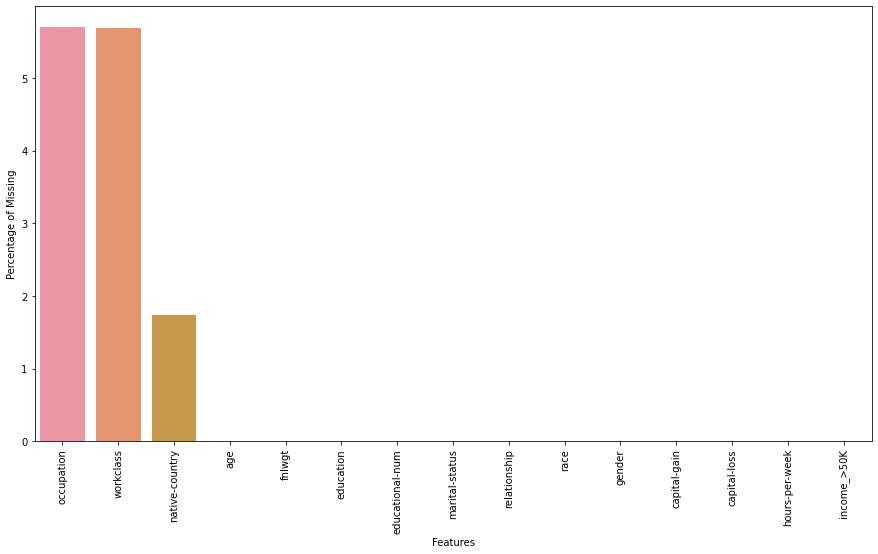

In [0]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = missing/len(df) * 100
missing_data = pd.concat([missing, missing_percent], axis = 1, keys=['Missing', 'Missing-Percentage'])
missing_data.head(20)
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x=missing[:20].index, y=missing_percent[:20].values)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing')

In [0]:
from sklearn.preprocessing import LabelEncoder

cols = list(df.dtypes[df.dtypes == 'object'].index)

In [0]:
df_dummy = df.copy()
df_dummy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [0]:
for c in cols:
  label = LabelEncoder()
  label.fit(list(df[c].values))
  df_dummy[c] = label.transform(list(df_dummy[c].values))

In [0]:
df_dummy.isnull().sum().sort_values(ascending=False)

Out[31]: age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [0]:
df_dummy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,50,3,20970,10,7,0,3,1,4,1,121,0,56,38,1
1,0,3,14899,2,14,4,7,3,4,1,0,0,6,38,0
2,14,3,7403,9,4,2,3,0,4,1,0,0,34,38,1
3,41,6,1061,5,10,2,13,0,4,1,0,0,34,38,0
4,8,6,4727,15,1,4,7,1,2,1,0,0,34,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,35,3,24677,9,4,2,3,0,4,1,0,0,45,38,1
43953,2,3,1724,11,15,4,7,3,4,0,0,0,34,38,0
43954,13,3,10632,15,1,0,11,1,4,1,0,0,53,38,0
43955,29,3,26434,9,4,4,11,1,4,0,0,0,28,38,0


In [0]:
df_dummy = df_dummy.rename(columns={'income_>50K': 'Income'})

In [0]:
df_dummy

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,3,20970,10,7,0,3,1,4,1,121,0,56,38,1
1,0,3,14899,2,14,4,7,3,4,1,0,0,6,38,0
2,14,3,7403,9,4,2,3,0,4,1,0,0,34,38,1
3,41,6,1061,5,10,2,13,0,4,1,0,0,34,38,0
4,8,6,4727,15,1,4,7,1,2,1,0,0,34,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,35,3,24677,9,4,2,3,0,4,1,0,0,45,38,1
43953,2,3,1724,11,15,4,7,3,4,0,0,0,34,38,0
43954,13,3,10632,15,1,0,11,1,4,1,0,0,53,38,0
43955,29,3,26434,9,4,4,11,1,4,0,0,0,28,38,0


In [0]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(df_dummy, random_state=123)
X_train = train.drop(["Income"], axis=1)
X_test = test.drop(["Income"], axis=1)
y_train = train.Income
y_test = test.Income

In [0]:
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from math import exp
import mlflow.xgboost
import numpy as np
import xgboost as xgb
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
from sklearn.metrics import roc_auc_score
from mlflow.models.signature import infer_signature

search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
  'learning_rate': hp.loguniform('learning_rate', -3, 0),
  'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
  'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
  'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
  'objective': 'binary:logistic',
  'seed': 123, # Set a seed for deterministic training
}

def train_model(params):
  # With MLflow autologging, hyperparameters and the trained model are automatically logged to MLflow.
  mlflow.xgboost.autolog()
  with mlflow.start_run(nested=True):
    train = xgb.DMatrix(data=X_train, label=y_train)
    test = xgb.DMatrix(data=X_test, label=y_test)
    # Pass in the test set so xgb can track an evaluation metric. XGBoost terminates training when the evaluation metric
    # is no longer improving.
    booster = xgb.train(params=params, dtrain=train, num_boost_round=1000,\
                        evals=[(test, "test")], early_stopping_rounds=50)
    predictions_test = booster.predict(test)
    auc_score = roc_auc_score(y_test, predictions_test)
    mlflow.log_metric('auc', auc_score)
 
    signature = infer_signature(X_train, booster.predict(train))
    mlflow.xgboost.log_model(booster, "model", signature=signature)
    
    # Set the loss to -1*auc_score so fmin maximizes the auc_score
    return {'status': STATUS_OK, 'loss': -1*auc_score, 'booster': booster.attributes()}
 
# Greater parallelism will lead to speedups, but a less optimal hyperparameter sweep. 
# A reasonable value for parallelism is the square root of max_evals.
spark_trials = SparkTrials(parallelism=10)
 
# Run fmin within an MLflow run context so that each hyperparameter configuration is logged as a child run of a parent
# run called "xgboost_models" .
with mlflow.start_run(run_name='xgboost_models'):
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=96,
    trials=spark_trials, 
  )

Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
INFO:hyperopt-spark:Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
INFO:hyperopt-spark:To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr

In [0]:
best_run = mlflow.search_runs(order_by=['metrics.auc DESC']).iloc[0]
print(f'AUC of Best Run: {best_run["metrics.auc"]}')

AUC of Best Run: 0.9304669356984347
